## Week 3:  Peer Graded Assignment
<i> Angelina Rose Joseph </i>

### Week 3.1:  Reading the Wiki Table

In [1]:
## Importing modules

from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text 
soup = BeautifulSoup(source, 'lxml')

In [3]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)


In [4]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [5]:
df.shape

(103, 3)

### Week 3.2:  Adding Location Data

In [6]:
coordinates=pd.read_csv("Geospatial_Coordinates.csv")

In [7]:
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
df=pd.merge(df,coordinates,how="left" ,left_on="PostalCode",right_on="Postal Code")

In [9]:
df.drop(df.columns[[3]], axis = 1, inplace = True)
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


### Week 3.3:  Clustering and Exploration

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

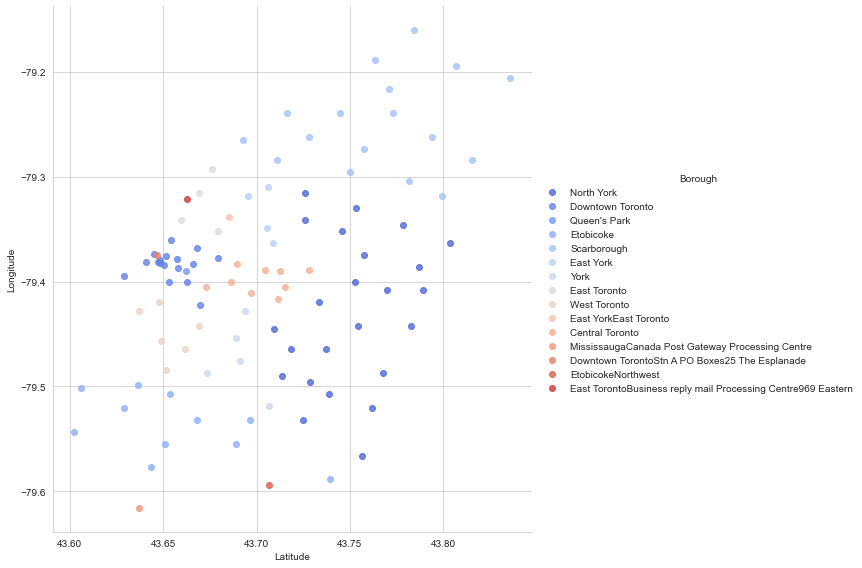

In [12]:
sns.set_style("whitegrid")
sns.lmplot(x='Latitude',y='Longitude',data=df,hue='Borough',fit_reg=False,height=8,palette='coolwarm')

### K Means Clustering

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [21]:
df_coordinates=df[['Longitude','Latitude']]

In [23]:
df_coordinates.head()

,Longitude,Latitude
0,-79.329656,43.753259
1,-79.315572,43.725882
2,-79.360636,43.654260
3,-79.464763,43.718518
4,-79.389494,43.662301


### Identifying optimal number of clusters for K Means

In [27]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df_coordinates) 
    kmeanModel.fit(df_coordinates)     
      
    distortions.append(sum(np.min(cdist(df_coordinates, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_coordinates.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df_coordinates, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df_coordinates.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [28]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.09465759721097933
2 : 0.07126796555811787
3 : 0.0535508219833819
4 : 0.04619387299532503
5 : 0.04185009053703105
6 : 0.03798880750008552
7 : 0.035239540639398
8 : 0.03244363149451694
9 : 0.03020880047494204
10 : 0.028563025747374876
11 : 0.02682854578526018
12 : 0.025673892779946215
13 : 0.02461075793799084
14 : 0.02339962011769977
15 : 0.022637848116709096
16 : 0.022562219644545568
17 : 0.021312906953032507
18 : 0.020697104239361202
19 : 0.01982323793888801


#### Elbow plot for Distortion
Ideal number of clusters: 7

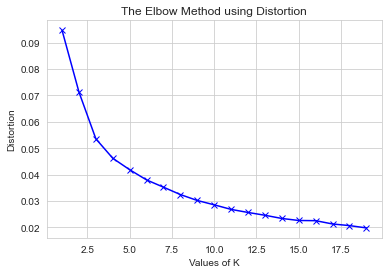

In [29]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

#### Elbow plot for Inertia
Ideal number of clusters: 6

In [30]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))

1 : 1.2433570196102182
2 : 0.6244927623699424
3 : 0.3561798503330312
4 : 0.27444008591966274
5 : 0.22423210992341813
6 : 0.18189867150755107
7 : 0.15273838641662943
8 : 0.13397745843784065
9 : 0.11795360110455891
10 : 0.10519386286705072
11 : 0.09043039866763511
12 : 0.08260066740972577
13 : 0.07556214614015418
14 : 0.0688692541619846
15 : 0.06431616447919418
16 : 0.061645403120504746
17 : 0.055485351238292485
18 : 0.05260674484123083
19 : 0.04744230359489348


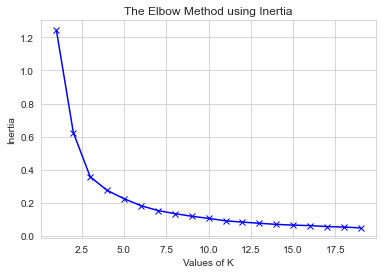

In [32]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

**Building a K Means model with 6 clusters of lattitude and longitude**

In [34]:
kmeanModel = KMeans(n_clusters=6).fit(df_coordinates) 
kmeanModel.fit(df_coordinates)     
print(sum(np.min(cdist(df_coordinates, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / df_coordinates.shape[0]) 
print((kmeanModel.inertia_)) 
mapping1[k] = sum(np.min(cdist(df_coordinates, kmeanModel.cluster_centers_, 
              'euclidean'),axis=1)) / df_coordinates.shape[0] 
mapping2[k] = kmeanModel.inertia_ 

0.03798880750008552
0.18189867150755107


In [35]:
labels = kmeanModel.predict(df_coordinates)
centroids = kmeanModel.cluster_centers_
print(labels)
print(centroids)

[2 2 5 4 5 1 3 0 2 5 5 1 3 2 2 5 5 1 3 2 5 5 3 2 5 5 3 0 0 2 5 5 3 0 4 2 5
 5 3 0 4 2 5 5 2 0 4 2 5 4 4 3 0 4 2 0 4 4 2 0 4 0 5 1 4 3 0 5 5 1 4 3 0 5
 5 5 1 4 3 5 5 1 3 5 5 3 5 5 1 4 3 5 5 1 4 3 5 5 1 5 2 1 1]
[[-79.39441482  43.76524349]
 [-79.52397655  43.6427047 ]
 [-79.32254027  43.69716727]
 [-79.24566825  43.77480817]
 [-79.51949121  43.72515467]
 [-79.39913405  43.66830196]]


In [36]:
df['cluster_label']=labels
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,cluster_label
0,M3A,North York,Parkwoods,43.753259,-79.329656,2
1,M4A,North York,Victoria Village,43.725882,-79.315572,2
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,5
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,5


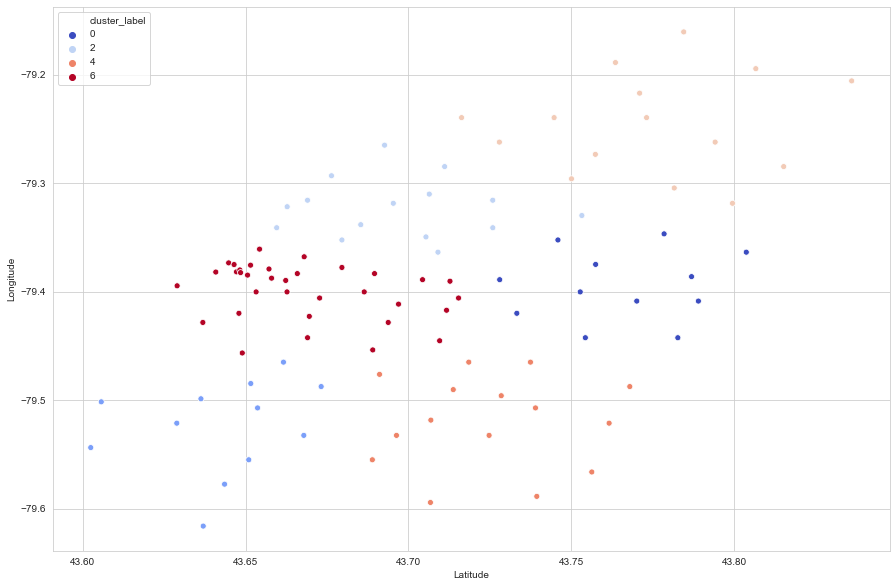

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15,10))

#colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(df['Latitude'], df['Longitude'], hue=df['cluster_label'], palette='coolwarm')#, alpha=0.5, s=7)

#ax = sns.scatterplot(centroids[:, 0], centroids[:, 1], palette='coolwarm', s=20, ec='black', legend=False, ax=ax)
plt.show()